In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def kde(z, w, xv):
    """
    @param z: center of gaussian kernel
    @param w: standard deviation of gaussian kernel
    @param xv: survey point
    """
    return sum(np.exp(-0.5 * ((z - xv) / (2 * w)) ** 2) / np.sqrt(2 * np.pi * w ** 2))

In [4]:
def density_estimate(y, w=0.1):
    """
    @param y: array of points
    @param w: bandwidth (standard deviation of gaussian kernel)
    """
    df = pd.DataFrame(columns=["x", "y"])
    for x in np.linspace(min(y) - w, max(y) + w, 1000):
        df = df.append({"x": x, "y" : kde(x, w, y)}, ignore_index=True)
    df.y = df.y
    return df


<img src="figs/kernel_density_estimation_2.png" alt="Drawing" style="height: 200px;"/>

* To form a KDE, we place a kernel—that is, a smooth, strongly peaked function—at the position of each data point. 
* We then add up the contributions from all kernels to obtain a smooth curve, which we can evaluate at any point along the x axis.
* The curve resulting from the KDE does not depend strongly on the particular choice of kernel function.

<img src="figs/kernel_density_estimation_1.png" alt="Drawing" style="height: 500px;"/>

In [3]:
d = pd.read_csv("data/presidents.csv", header=None)[2].values
d

array([ 94,  48,  96,  96,  96,  48,  96,  48,   1,  47,  48,  16,  32,
        48,  48,  49,  47,  96,  48,   7,  41,  48,  48,  48,  54,  90,
        48,  96,  29,  67,  48, 146,  92,  96,  34,  62,  67,  29,  48,
        96,  48,  96,  96])

In [5]:
df = density_estimate(d, w=1)

Text(0.5, 1.0, 'Kernel Density Estimates')

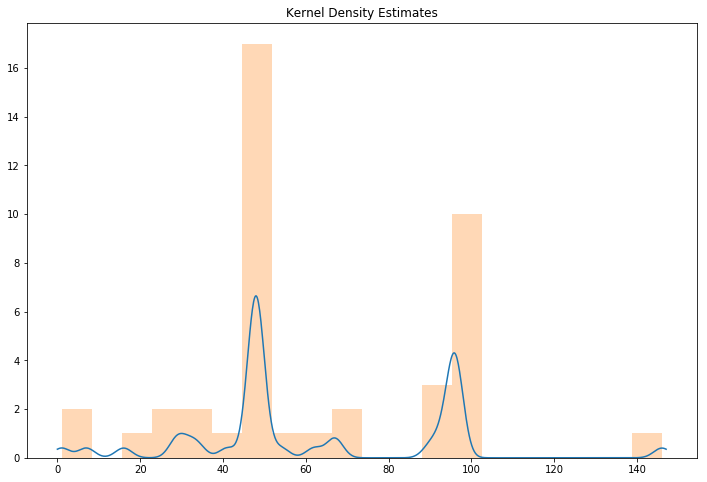

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(df.x, df.y)
plt.hist(d, bins=20, alpha=0.3)
plt.title("Kernel Density Estimates")

__using library__: https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/